In [1]:
import pandas as pd


In [2]:
titanic=pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
titanic=titanic.dropna()
#dropping female if its 0 means female 1 thean male if i dropped male then 0=male 1=female
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex

,male
1,0
3,0
6,1
10,0
11,0
...,...
871,0
872,1
879,0
887,0


In [26]:
#now embarked but it has 3 outcomes so so we take 2 if both are 0 0 then means answer is third one we dropped
Embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)
Embarked

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [27]:
titanicdata=pd.concat([titanic,sex,Embarked],axis=1)
titanicdata.drop(['Sex','Embarked'],axis=1)#axis=1 is important to feed that drop the column SEX

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,0,0,1
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,1,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1


In [28]:


#First we have to select dependent and independent 
feature_col=['PassengerId','Pclass','male','Age','SibSp','Parch','Fare','Q','S']
x=titanicdata[feature_col]
y=titanicdata.Survived

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
#pruning is actually removing unwanted branches from tree 
#ccp_alpha is the instance we use in our classifier teh defualt value is 0.0 but when u give value > 0 it will prune your tree

In [132]:
#Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4) #ccp_alpha=0.01 it is used when no max depth or max feature is selected
#nOW TRAIN THE MODDEL WITH TRAINING DATA
clf1=clf.fit(x_train,y_train)

In [133]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [134]:
x_test

,PassengerId,Pclass,male,Age,SibSp,Parch,Fare,Q,S
473,474,2,0,23.00,0,0,13.7917,0,0
110,111,1,1,47.00,0,0,52.0000,0,1
195,196,1,0,58.00,0,0,146.5208,0,0
492,493,1,1,55.00,0,0,30.5000,0,1
835,836,1,0,39.00,1,1,83.1583,0,0
806,807,1,1,39.00,0,0,0.0000,0,1
27,28,1,1,19.00,3,2,263.0000,0,1
681,682,1,1,27.00,0,0,76.7292,0,0
319,320,1,0,40.00,1,1,134.5000,0,0
366,367,1,0,60.00,1,0,75.2500,0,0


In [135]:
#Predictions by giving x test it eill predic y
predictions=clf.predict(x_test)
predictions


array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [136]:
#show probablity difference between trees that doesnt have stopping crietira and tree that do
#The difference between predict and predict_proba is that predict will give you output like 0,1. Whereas predict_proba will give you the probability value of y being 0 or 1.
#In your case it says there is 23% probability of point being 0 and 76% probability of point being 1.
#Now where to use predict and predict_proba.
#Predict can be used normally to get prediction values.
#But suppose you are working on cancer diagnosis problem and you want to be very sure with your results. So in that case you can use predict_proba which will give you class probability values and you can set some threshold like if predict_proba_value > .98 return class 1 else 0. So basically with the help of predit_proba we can set threshold as per our needs.
clf.predict_proba(x_test)
    

array([[0.07142857, 0.92857143],
       [0.55172414, 0.44827586],
       [0.07142857, 0.92857143],
       [0.55172414, 0.44827586],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.55172414, 0.44827586],
       [0.55172414, 0.44827586],
       [0.07142857, 0.92857143],
       [0.07142857, 0.92857143],
       [0.55172414, 0.44827586],
       [0.55172414, 0.44827586],
       [0.        , 1.        ],
       [0.55172414, 0.44827586],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07142857, 0.92857143],
       [0.        , 1.        ],
       [0.07142857, 0.92857143],
       [0.        , 1.        ],
       [0.07142857, 0.92857143],
       [0.55172414, 0.44827586],
       [0.07142857, 0.92857143],
       [0.55172414, 0.44827586],
       [0.55172414, 0.44827586],
       [0.        , 1.        ],
       [0.55172414, 0.44827586],
       [0.55172414, 0.44827586],
       [0.

In [137]:
##Model Evaluation using Confusion Matrix
#A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix
#Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

array([[ 9,  0],
       [ 9, 28]], dtype=int64)

In [138]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.50      1.00      0.67         9\n           1       1.00      0.76      0.86        37\n\n    accuracy                           0.80        46\n   macro avg       0.75      0.88      0.76        46\nweighted avg       0.90      0.80      0.82        46\n'

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions))# recall is the measure of our model correctly identifying True Positives.k

Accuracy: 0.8043478260869565
Precision: 1.0
Recall: 0.7567567567567568


In [140]:
#SPLITTING TECHNIQUES IN DECISON TREE
#1) Criterion: its default value is gini nut you cans alsos elect entropy is the technique to select the root node from where you want to split the tree
#2)Splitter : It has two values best and random ,with best it selects the best possible instace to split and with random it wills eltc randomly any
#3) Max Features: It includes int values if u select then it will check only 20 instancs give the output fom it.You can select either max depth or max features its up to u
#4) random_state: If you give the random state value less than the no of colums you have in data set then there will be some randmization but if it is greater or in inteeger then it will give same tree over and over but if i dindts et random state then it will be super random.
#5) class wieight: it tells us which class has more info gain than other which column is more important than the other which one is corelated


In [141]:
#Feature importance
featurenames=x.columns
featurenames

Index(['PassengerId', 'Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Q',
       'S'],
      dtype='object')

In [142]:
#it tells us the feature or column on x axis importance in prediction like here is amle column has more importnace than other columns it is on top
featureimportance=pd.DataFrame(clf.feature_importances_,index=featurenames.sort_values())
featureimportance

,0
Age,0.054295
Fare,0.000000
Parch,0.469386
PassengerId,0.329739
Pclass,0.000000
Q,0.000000
S,0.146580
SibSp,0.000000
male,0.000000


<AxesSubplot:>

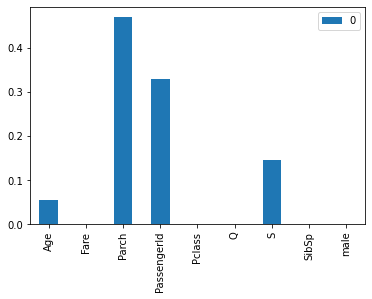

In [143]:
featureimportance.plot(kind='bar')

[Text(0.5, 0.9, 'male <= 0.5\nentropy = 0.952\nsamples = 137\nvalue = [51, 86]\nclass = Survived'),
 Text(0.23076923076923078, 0.7, 'Age <= 3.0\nentropy = 0.464\nsamples = 61\nvalue = [6, 55]\nclass = Survived'),
 Text(0.15384615384615385, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not Survived'),
 Text(0.3076923076923077, 0.5, 'Fare <= 11.488\nentropy = 0.358\nsamples = 59\nvalue = [4, 55]\nclass = Survived'),
 Text(0.15384615384615385, 0.3, 'PassengerId <= 159.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = Not Survived'),
 Text(0.07692307692307693, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.23076923076923078, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = Not Survived'),
 Text(0.46153846153846156, 0.3, 'PassengerId <= 502.0\nentropy = 0.225\nsamples = 55\nvalue = [2, 53]\nclass = Survived'),
 Text(0.38461538461538464, 0.1, 'entropy = 0.371\nsamples = 28\nvalue = [2, 26]\nclass = Survived'),
 Text(0.538461538461538

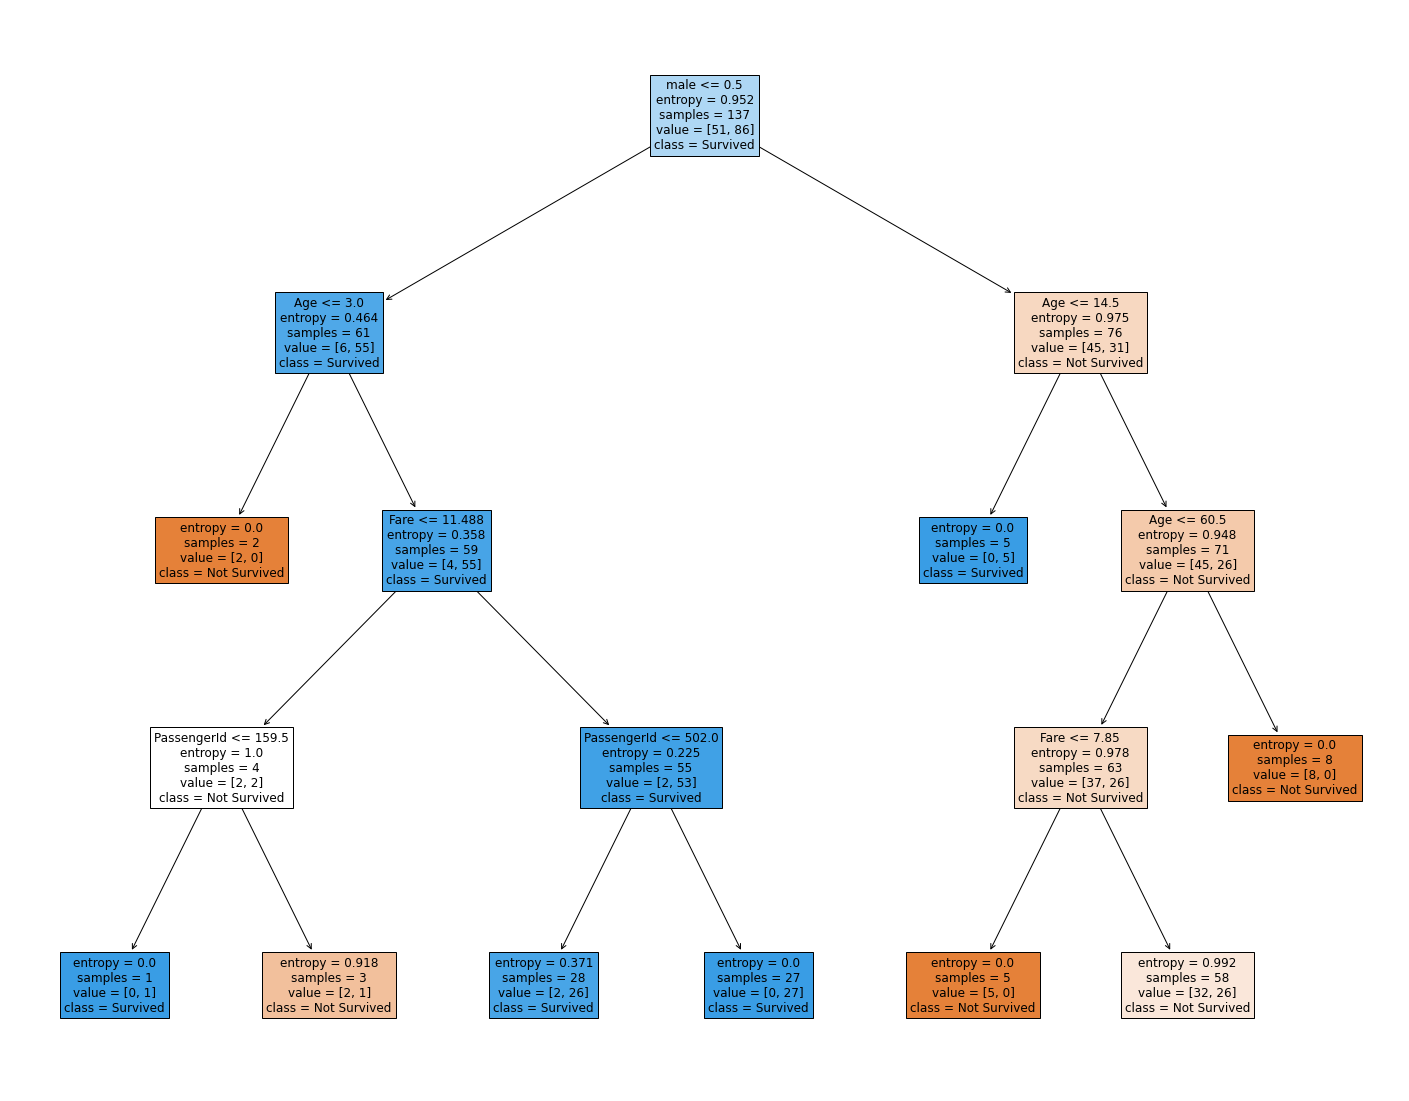

In [148]:
#To see how your plot is working  draw tree
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=featurenames,class_names={0:'Not Survived',1:'Survived'},filled=True,fontsize=12)
#tree.plot_tree(ds classifiername,feature_names=columns on x axis ,class_names={0:'Not Survived',1:'Survived'},flled=True,fontsize=12)

In [145]:
#pruning is actually removing unwanted branches from tree 
#ccp_alpha is the instance we use in our classifier teh defualt value is 0.0 but when u give value > 0 it will prune your tree